In [1]:
import numpy as np
import rasterio as rio
from rasterio.enums import Resampling
import matplotlib.pyplot as plt
import rioxarray as rxr # for the extension to load
import xarray as xr

In [5]:
def print_raster(raster):
    print(
        f"shape: {raster.rio.shape}\n"
        f"resolution: {raster.rio.resolution()}\n"
        f"bounds: {raster.rio.bounds()}\n"
        f"sum: {raster.sum().item()}\n"
        f"CRS: {raster.rio.crs}\n"
    )

In [27]:
# import dem from the geolocation function
uavsar_dem =rxr.open_rasterio('/Users/jacktarricone/ch1_jemez_data/new_py_inc/lkv.z.tif')
uavsar_dem.spatial_ref
    
# convert all 0's to nan
# uavsar_dem[uavsar_dem == 0] = np.nan # convert all 0's to NaN's

# print_raster(uavsar_dem)

<xarray.DataArray 'spatial_ref' ()>
array(0)
Coordinates:
    spatial_ref  int64 0
Attributes:
    crs_wkt:                      GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...
    semi_major_axis:              6378137.0
    semi_minor_axis:              6356752.314245179
    inverse_flattening:           298.257223563
    reference_ellipsoid_name:     WGS 84
    longitude_of_prime_meridian:  0.0
    prime_meridian_name:          Greenwich
    geographic_crs_name:          WGS 84
    grid_mapping_name:            latitude_longitude
    spatial_ref:                  GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...
    GeoTransform:                 -106.56379699707031 5.556e-05 0.0 36.105346...

In [29]:
fabdem = rxr.open_rasterio('/Users/jacktarricone/ch1_jemez_data/new_py_inc/jemez_fabdem.tif')
fabdem.spatial_ref

AttributeError: 'DataArray' object has no attribute 'spatialref'

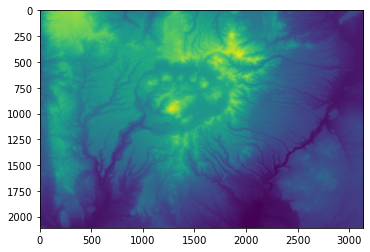

In [3]:
with rio.open('/Users/jacktarricone/ch1_jemez_data/new_py_inc/jemez_fabdem.tif') as src:
    fabdem = src.read(1)
plt.imshow(fabdem)

In [ ]:
upscale_factor = 2

with rio.open("example.tif") as dataset:

    # resample data to target shape
    data = dataset.read(
        out_shape=(
            dataset.count,
            int(dataset.height * upscale_factor),
            int(dataset.width * upscale_factor)
        ),
        resampling=Resampling.bilinear
    )

    # scale image transform
    transform = dataset.transform * dataset.transform.scale(
        (dataset.width / data.shape[-1]),
        (dataset.height / data.shape[-2])
    )